# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
#minimum_price = prices.min()
minimum_price = np.min(prices)

# TODO: Maximum price of the data
#maximum_price = prices.max()
maximum_price = np.max(prices)

# TODO: Mean price of the data
#mean_price = prices.mean()
mean_price = np.mean(prices)

# TODO: Median price of the data
#median_price = prices.median()
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
#std_price = prices.std()
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $454,342.94
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

'RM': an increase in RM should lead to **increase** in the value of MEDV, as houses with more rooms tend to be more expensive. 

'LSTAT': an increase in this should lead to a **decrease** in the value of MEDV, as more 'lower class' people would tend to lower property values. 

'PTRATIO': an increase in this should **decrease** the value of MEDV, as having more students per teacher indicates a poorer neighborhood, since rich neighborhoods can afford more teachers. 

**reviewer suggestion:** plot price against each feature to see the correlations visually

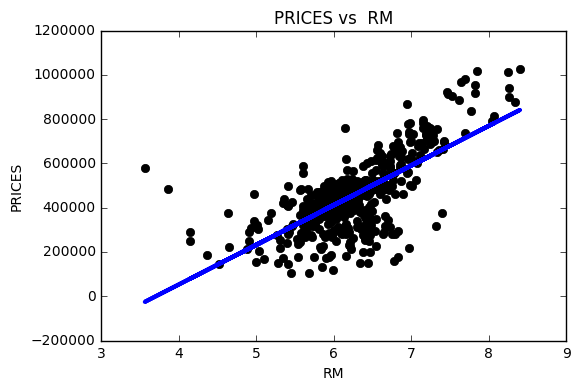

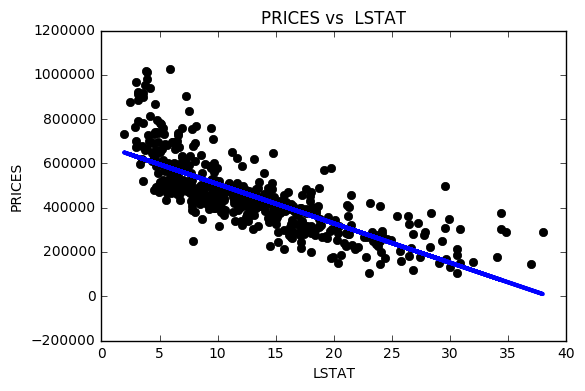

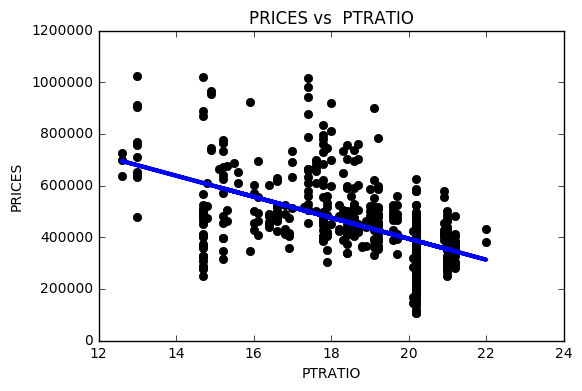

In [3]:
import matplotlib.pyplot as plt

# plot price against each feature to see the correlation visually
# (from reviewer's code)
for col in features.columns:
    fig, ax = plt.subplots()
    fit = np.polyfit(features [col], prices, deg=1) # We use a linear fit to compute the trendline
    ax.scatter(features [col],  prices)
    plt.plot(features [col], prices, 'o', color='black')
    # This plots a trendline with the regression parameters computed earlier. 
    # We should plot this after the dots or it will be covered by the dots themselves
    ax.plot(features[col], fit[0] * features[col] + fit[1], color='blue', linewidth=3) 
    plt.title('PRICES vs  '+ str(col)) # title here
    plt.xlabel(col) # label here
    plt.ylabel('PRICES') # label here

**reviewer suggestion:** use data.corr() (from Pandas) to examine correlation

In [4]:
# see https://en.wikipedia.org/wiki/Correlation_and_dependence
data.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


In [5]:
# so you can look up the correlation coefficient between any two variables - 
# eg between RM (#rooms) and MEDV (price) there's a coefficient of 0.697, 
# indicating a strong correlation.
# a coefficient of 0 would indicate no correlation, ie just noise. 
# while a negative coefficient is just an inverse relationship.
# the closer towards 1 or -1, the cleaner the signal - 
# the closer towards 0, the noisier the signal.
# it's NOT a measure of slope!

In [6]:
# also, `describe` is a good way to get a quick overview of a Pandas dataframe -

data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564,454342.944785
std,0.643650,7.081990,2.111268,165340.277653
min,3.561000,1.980000,12.600000,105000.000000
25%,5.880000,7.370000,17.400000,350700.000000
50%,6.185000,11.690000,19.100000,438900.000000
75%,6.575000,17.120000,20.200000,518700.000000
max,8.398000,37.970000,22.000000,1024800.000000


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [7]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [8]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

Yes, the model has captured the variation of the target variable, because the R^2 score is close to 1.0 - a score of 1.0 indicates perfect predictive value, while 0.0 indicates no predictive value. 

You can tell also by looking at the table that the true value and the prediction are correlated, as `prediction value = true value +/- 1.2`. 

**Reviewer suggestion:** Examine correlation visually with Seaborn -

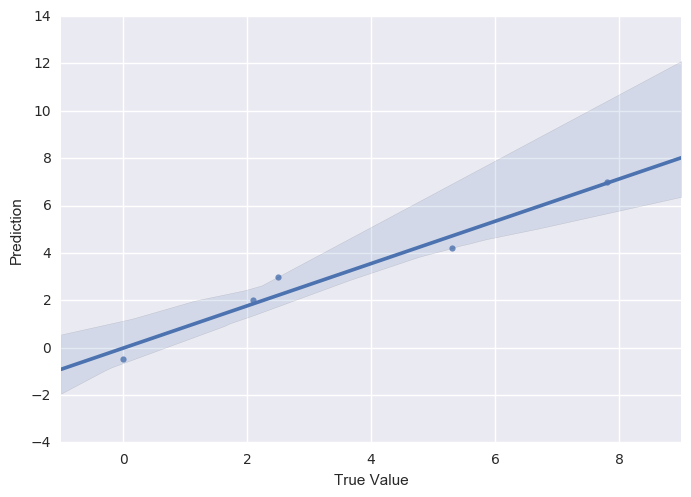

In [9]:
import seaborn as sns
sample_df = pd.DataFrame([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]).reset_index()
sample_df.columns = ['True Value', 'Prediction']
sns.regplot('True Value', 'Prediction', sample_df)


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [10]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

By reserving some of the data for testing, you can evaluate the performance of the model against data it hasn't seen before, to have an idea of how it will perform against any future unseen data.

If you train the model on all of the data without testing it on an independent set of data, and optimize the score, you will end up with an **overfitted** model that will not perform well on unseen data - the model would have **high variance**. Adding more data to the training wouldn't help. 

**Reviewer's notes:**

It is not entirely correct to state: "If you train the model on all of the data without testing it on an independent set of data, and optimize the score, you will end up with an overfitted model that will not perform well on unseen data" we are not automatically avoiding over-fitting if we are splitting, it might be that our model is great or it might not be the case, the problem is that without splitting we wouldn't be able to assess if the model is over-fitting

So I should have said - If you don't have a way to test your model (e.g. with withheld test data), you won't have any idea of how your model might perform with real-world data - it could be over- or under-fitting to the data.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

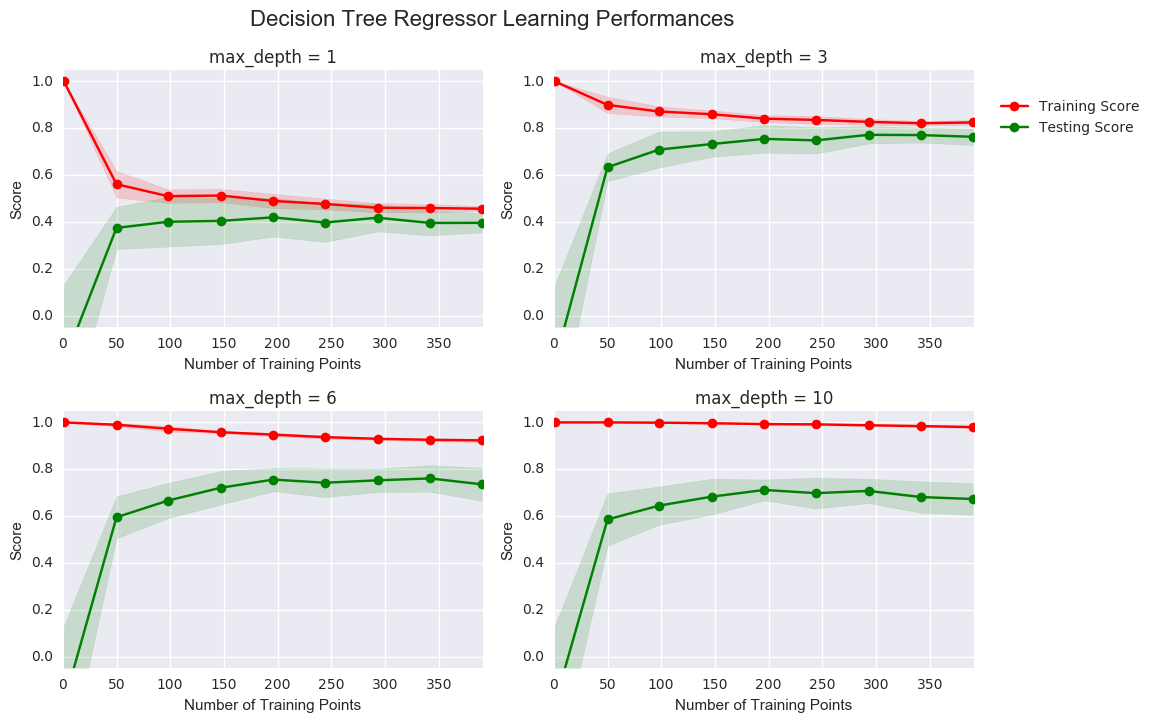

In [11]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

For maximum depth=6, as more training points are added, the score of the **training curve** goes down (i.e. it gets worse), because the model has a harder time fitting all of the training data. 

The score of the **testing curve** goes up though, because with more training data the model is better able to predict the price for the test data. 

Adding more training points probably wouldn't benefit the model, as the testing score seems to have leveled out by 300 training points or so.

So the model is somewhat **overfit**, which is indicated by the gap between the training and testing curves, and the fact that they are not converging very well to a good score. To improve the model the complexity should be reduced, e.g. reduce the maximum depth of the tree. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

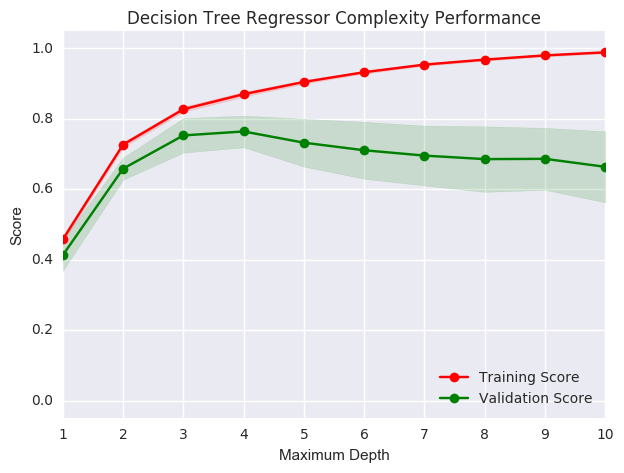

In [12]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

When the model is trained with a maximum depth of 1, the model suffers from **high bias** - this is indicated by both training and validation scores being relatively low, and the lack of a significant gap between them. This means that the data is **underfit** - the model is not complex enough to fit even the training data very well. 

When the model is trained with a maximum depth of 10, the model suffers from **high variance** - this is indicated by a high training score and low validation score (i.e. there is a large gap between them), as well as the larger variance (the shaded region). This indicates that the data is **overfit** - the model accounts for the training data very well, but on seeing new data it performs poorly. 

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

The model would best generalize to unseen data when the maximum depth is **3 or 4** - this is where the **validation score** is highest (i.e. error is lowest), and is the happy medium between the areas of underfitting and overfitting. This U-shape is typical for the validation score. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

The grid search technique is a brute-force search over a range of parameter values for the model with the best score - this lets you optimize a learning algorithm. For instance, for a decision tree you can search for the `max_depth` value that returns the best validation score. 

You can also specify more than one parameter and their values, and it will build a model for each combination of parameter values and return the best one. 


**Reviewer's notes:**

Pro tip: There are other techniques that could be used for hyperparameter optimization in order to save time like RandomizedSearchCV, in this case instead of exploring the whole parameter space just a fixed number of parameter settings is sampled from the specified distributions. This proves useful when we need to save time but is not necessary in cases in cases like ours where the data set is relatively small.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

K-fold cross-validation training splits the dataset randomly into k partitions, trains the model on all but one of them, then evaluates the model against the held-out partition - this is repeated for each of the k partitions, and all of the test scores are averaged to produce the cross-validation testing accuracy. 

This is helpful when optimizing a model with grid search, because it gives you a better estimate of the real-world performance of the model - different train/test splits will give you different testing accuracies, so it makes sense to try a range of different splits and average the results. 

If you just used one train-test split for training and evaluation, you're more liable to overfit to that one training dataset, and so the test score won't be as good as if you use k-fold cross-validation. 



### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [13]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    #regressor = DecisionTreeRegressor()
    regressor = DecisionTreeRegressor(random_state=42)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_func = make_scorer(performance_metric)

    # TODO: Create the grid search object
    #grid = GridSearchCV(regressor, params, scoring_func, cv_sets) # error - need to specify cv param
    grid = GridSearchCV(regressor, params, scoring_func, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [14]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The optimal model has a maximum depth of 4, which is as expected from Question 6 (had said either 3 or 4 would be best).

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [15]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **

I would recommend selling the houses for \$403k, \$237k, and \$932k respectively - these are the predicted selling prices from the regression model, which seem reasonable given that the houses have a roughly proportional number of rooms (5, 4, and 8). 

**Reviewer's suggestion:** Use k nearest neighbors to compare price of houses in similar neighborhoods

In [16]:
from sklearn.neighbors import NearestNeighbors

def getNearestNeighborPrice(features, x, k):
    "Fit the vector x to the k nearest records in features and return the avg price and stddev of those neighbors"
    nearest = NearestNeighbors(k)
    nearest.fit(features)
    _, indices = nearest.kneighbors(x)
    p = [prices[i] for i in indices]
    priceAvg = np.mean(p)
    priceStd = np.std(p)
    return priceAvg, priceStd

# iterate over houses, get k nearest neighbors
k = 5
for i, x in enumerate(client_data):
    priceAvg, priceStd = getNearestNeighborPrice(features, x, k)
    print "The predicted {} nearest neighbors price for home {} is: ${:,.2f} with stddev of ${:,.2f}".format(
        k, i+1, priceAvg, priceStd)
    

The predicted 5 nearest neighbors price for home 1 is: $372,540.00 with stddev of $63,621.34
The predicted 5 nearest neighbors price for home 2 is: $162,120.00 with stddev of $36,479.61
The predicted 5 nearest neighbors price for home 3 is: $897,120.00 with stddev of $108,587.67


So the **first house**, which has 5 rooms, 17% neighborhood poverty level, and 15-to-1 student-teacher ratio is predicted by the model to sell for \$403k, while the average price in the 5 most similar neighborhoods is \$373k with stddev of \$64k. So that seems like a reasonable estimate. 

The **second house**, which has 4 rooms, 32% neighborhood poverty level, and a 22-to-1 student-teacher ratio is predicted by the model to sell for \$237k, while the average price in the 5 most similar neighborhoods is \$162k with stddev of \$36k. So this seems a bit high. 

It's possible the dataset just doesn't have many similar neighborhoods, in which case the k nearest neighbor algorithm would wind up picking more distant records. If we print the array `p` in getNearestNeighborPrices, we see the prices are [155400, 184800, 214200, 151200, 105000], so for some reason the model is predicting this house would sell above the high end of that range. If we were planning to use this algorithm it would be worth digging into this case in more detail to find out what was going on, in order to debug the model - e.g. we could look at the features of the 5 nearest neighbors and see if that gave us any clues. 

The **third house**, with 8 rooms, a 3% poverty level, and 12-to-1 student-teacher ratio is predicted by the model to sell for \$932k, while the average price in the 5 most similar neighborhoods is \$897k with stddev of \$109k. So this seems like a reasonable estimate. 




**Reviewer suggestion:** Show predicted house prices along with histogram of all house prices.

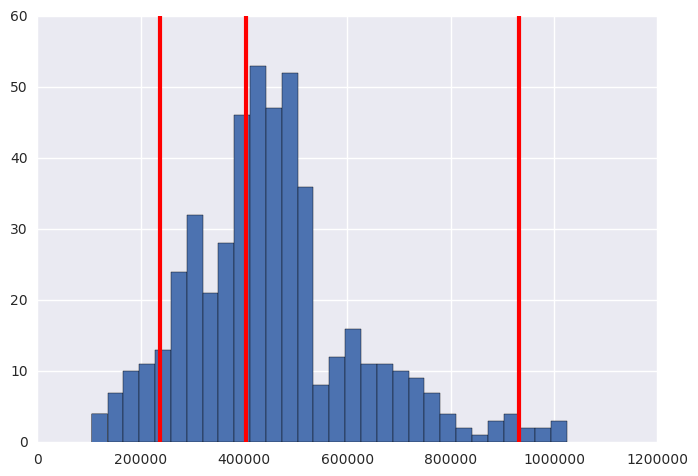

In [17]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 30)
for price in reg.predict(client_data):
    plt.axvline(price, c = 'r', lw = 3)

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [18]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The constructed model should probably NOT be used in a real-world setting - it is not robust enough to make consistent predictions - e.g. over 10 trials the model came back with a range of values of \$391k to \$428k for a particular client. 

The data is also from 1978, and housing patterns might have changed since then - e.g. lower income residents might have more or less effect on housing values, or larger houses could be in less demand, affecting the prices. 

The lack of robustness of the model indicates it might be missing some features - e.g. it doesn't account for the square footage, or number of bathrooms, whether it has a pool, etc. 

And urban cities like Boston where the data was collected might have different housing patterns than a rural city - e.g. houses could be much cheaper. This is a case where more data that included rural houses would be helpful (as well as a feature for population density, or the nearest town, or distance from Boston, etc.). 

So even if you pick the best model with the best parameters, it still might not be good enough for real world applications - the dataset might need to have more records, or more features to capture some missing aspect of the world.


**Reviewer note:** One of the biggest advantages when using a decision tree as a classifier in the interpretability of the model. Therefore we can actually visualize this exact tree with the use of export_graphviz:

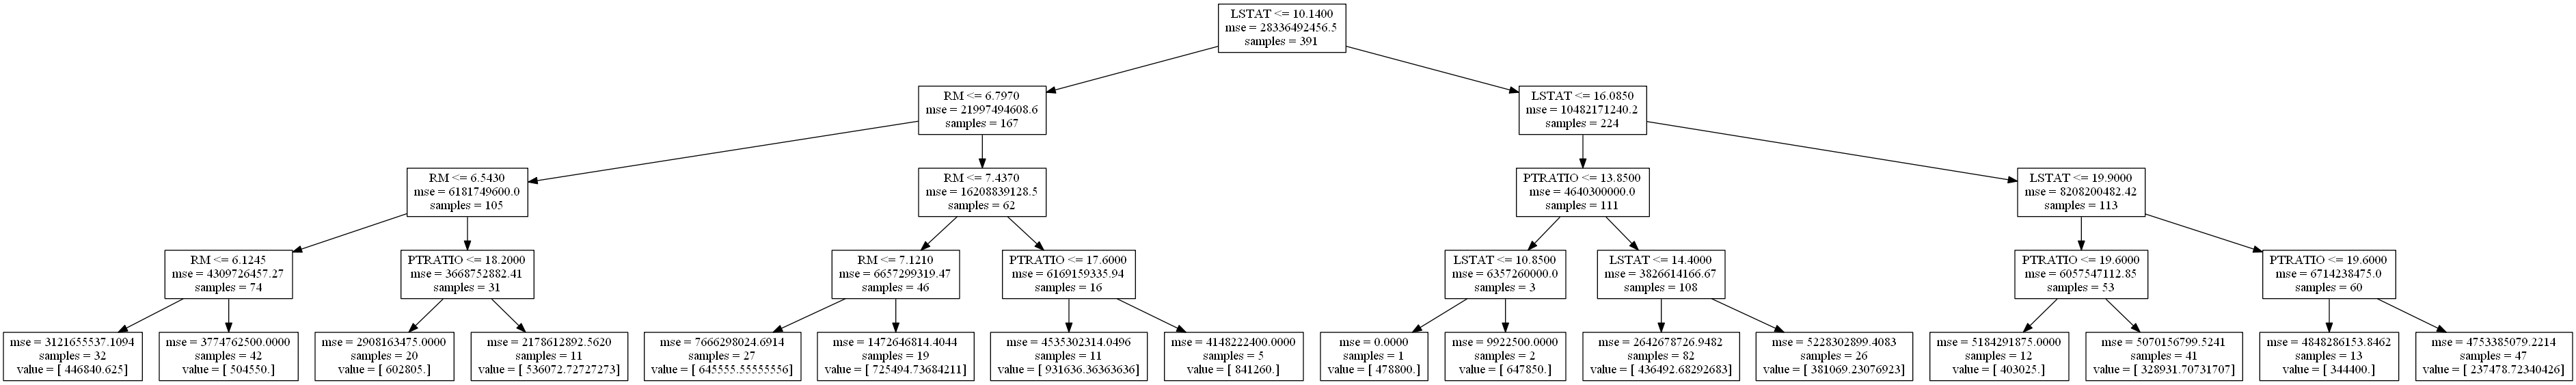

In [19]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image

clf = DecisionTreeRegressor(max_depth=4)
clf = clf.fit(X_train, y_train)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=X_train.columns)
    #class_names="PRICES", filled=True, rounded=True, special_characters=True)
v = dot_data.getvalue()
graph = pydot.graph_from_dot_data(v)
#Image(graph.create_png())
Image(graph[0].create_png())

